1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


[ 4.43510801e-01 -4.43593526e-01  2.84706989e-02  9.93474524e-01
  8.81888962e-01 -1.09350240e+00  7.15656111e-01 -1.26473630e+00
  1.14779726e+00 -7.99989992e-02  9.39301210e-01  5.11905843e-01
  8.07042663e-02 -4.60409011e-01 -1.62268014e-01 -5.22017494e-01
 -4.52206394e-02  1.28532366e+00  5.83335241e-01  4.48465722e-01
  2.43839568e-01 -3.60028162e-01 -1.77329960e+00  7.16391713e-01
  4.46606232e-01 -8.22320697e-01 -3.21287678e-01  8.05608234e-01
 -7.80766720e-01 -4.10880057e-01  3.55146693e-01 -1.17355686e-01
  2.32528275e+00 -1.00973069e+00 -1.42863123e-01  3.75776904e-01
  3.70578399e-01 -1.23620699e+00  2.36405660e+00 -1.05015960e+00
 -9.62720963e-01  1.05377728e-01  7.15304556e-01  7.63728856e-01
  1.14030873e-01  1.13370294e+00  7.19042407e-01 -3.49852733e-01
 -1.13273277e+00 -4.11296234e-01 -2.85128796e-02 -1.30102790e+00
 -3.12893449e-01  3.71406310e-02  1.07902529e+00  1.54080679e-01
  2.24753420e-01 -2.14091242e-01  7.35222200e-01 -4.29704527e-01
 -4.56351618e-01  2.08871

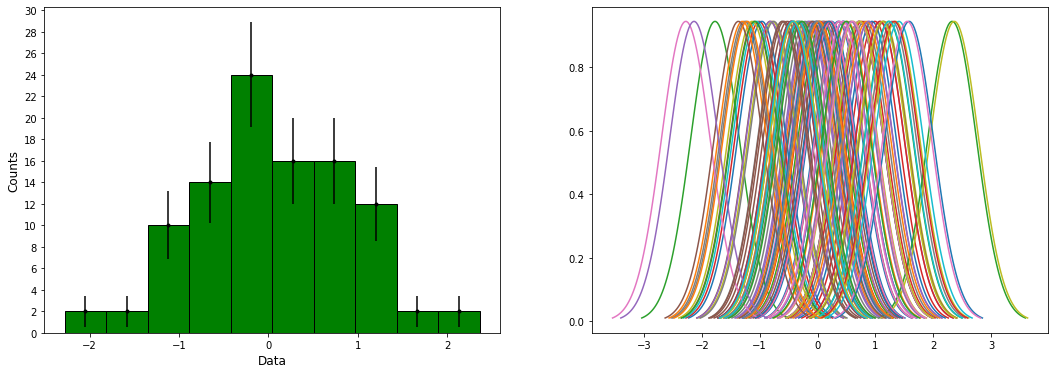

In [55]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm
from scipy.integrate import trapz

N=100
sigma1=1.0
a = npr.normal(loc=0.0, scale=sigma, size=N)
print(a)


fig, (ax1,ax2) = plt.subplots(figsize=(18,6),nrows=1, ncols=2)  #Crea una figura con un solo axes


bins, bin_edges, patches = ax1.hist(a, 10, facecolor='g',edgecolor="black")
ax1.set_ylabel("Counts",fontsize=12)
ax1.set_xlabel("Data",fontsize=12)
ax1.yaxis.set_major_locator(MultipleLocator(2.000))

bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2   #Calcola e posizioni centrali dei bin
bins_err=np.sqrt(bins)
ax1.errorbar(bin_centres , bins, yerr=bins_err, fmt='.k')

############
sigma2= 1.06 *sigma * (N**(-1/5))

#for i in range(N):
#    x=np.linspace(a[i] - 3 * sigma2, a[i] + 3 * sigma2, 100)    #Creates N guassian with norm and plots them
#    ax2.plot(x,norm.pdf(x,a[i], sigma2))

x=np.linspace(a - 3 * sigma2, a + 3 * sigma2, 100)  #It is not necessary to create a loop 
x1=np.linspace(a[1] - 3 * sigma2, a[1] + 3 * sigma2, 100)
ax2.plot(x,norm.pdf(x,a, sigma2))

sumg=np.sum(norm.pdf(x,a, sigma2))
print(norm.pdf(x1,a[1], sigma2),norm.pdf(x,a, sigma2),sumg)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

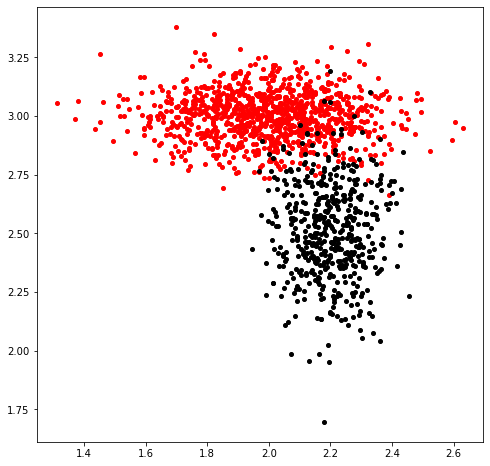

In [84]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm
from scipy.integrate import trapz


def dataset(mean1,std1,mean2,std2,N):
    d1 = npr.normal(loc=mean1, scale=std1, size=N)
    d2 = npr.normal(loc=mean2, scale=std2, size=N)
    return d1,d2                      #To access d1 or d2 simply call dataset(...)[0 or 1]


#Inizializing parameters
par=[2,0.1,3,0.5,500]
par2=[2.2,0.1,2.5,0.2,500]

data1= dataset(par[0],par[1],par[2],par[3],par[4])
data2= dataset(par2[0],par2[1],par2[2],par2[3],par2[4])

fig2, ax = plt.subplots(figsize=(8,8))
ax.plot(data[0],data[1],'.r',markersize=8)
ax.plot(data2[0],data2[1],'.k',markersize=8)


#Un' altra soluzione è riportata alla lezione 8

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

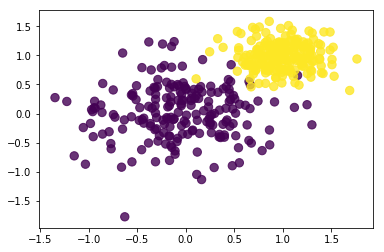

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

LinregressResult(slope=0.0032597701220305835, intercept=-0.15432816763069473, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.0007327014008445789, intercept_stderr=0.008458951961471835)
[-0.18053968 -0.14835147 -0.11658941 -0.09053693 -0.06917519 -0.12938387
 -0.14441328 -0.10583914  0.05822731  0.2775    ]
[0.44247838 0.40980401 0.44089944 0.41464484 0.4647127  0.47204643
 0.44378974 0.39928691 0.4830778  0.84903209]


<ErrorbarContainer object of 3 artists>

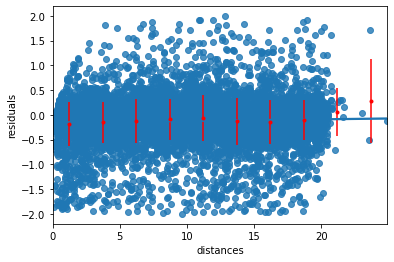

In [140]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy.stats import binned_statistic
import seaborn as sns


d = np.load('residuals_261.npy',allow_pickle=1).item()
data = pd.DataFrame(d)
data


#Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2

dataf = data[abs(data['residuals']) < 2]

#perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress()
fit= linregress(dataf['distances'],dataf['residuals'])
print(fit)

#plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. 
#The result of the regression should be displayed on the plot

sns.regplot(x="distances", y="residuals", data=dataf);

#Fill 3 numpy arrays
#x, serving as an array of bin centers for the "distance" variable. 
#It should range from 0 to 20 with reasonable number of steps (bins)

#nbins=int(np.sqrt(len(dataf['distances'])))
nbins=10
hist, bin_edges = np.histogram(dataf['distances'], bins = nbins)
x = (bin_edges[:-1] + bin_edges[1:]) / 2

#y, the mean values of the "residuals", estimated in slices (bins) of "distance"


mean = binned_statistic(x = dataf['distances'], 
                     values = dataf['residuals'], 
                     statistic = 'mean', 
                     bins = nbins)
x2 = (mean.bin_edges[:-1] + mean.bin_edges[1:]) / 2   #Questo è un altro modo per calcolare la lista x
y = mean.statistic

#erry, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"

err = binned_statistic(x = dataf['distances'], 
                     values = dataf['residuals'], 
                     statistic = 'std', 
                     bins = nbins)

erry = err.statistic

#Plot the profile plot on top of the scatter plot

plt.errorbar(x,y,yerr=erry,fmt=".r")

